
This is the code for Task 4 Prodigy Techinfo internship
*   Hand Gesture Recognition
*   The Date is Jan-24

Dataset: https://data.mendeley.com/datasets/y9svrbh27n/1

The Code is written by Muhammad Mudassir Majeed

# Section 1: Load Data

Here we will use transfer learning Approach

In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# for Model 1
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as preprocess_input_vgg
from keras.applications.vgg16 import decode_predictions as decode_vgg

# for Model 2
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input as preprocess_input_densenet
from keras.applications.densenet import decode_predictions as decode_densenet


from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt

# For Evalutaion
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Mount Drive and Folder

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
Data_Folder = glob('PSL')

# Section 2: Pre-Process Data

In [4]:
train_datagenerate = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [5]:
test_datagenerate = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagenerate.flow_from_directory('/content/gdrive/MyDrive/Assignment 2 DL Sets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1140 images belonging to 37 classes.


In [7]:
test_set = test_datagenerate.flow_from_directory('/content/gdrive/MyDrive/Assignment 2 DL Sets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 370 images belonging to 37 classes.


# Section 3: Model Buiding

We will train model using transfer learning and evaluate results

*   Compile Model
*   Train Model

## Section 3a: VGG16

In [9]:
%%time
vgg_case2 = VGG16(weights = "imagenet", include_top=False, input_shape = (224,224, 3))
#include_top is false to ignore the fully connected classifier part on top of the model.

CPU times: user 503 ms, sys: 95.2 ms, total: 598 ms
Wall time: 503 ms


In [10]:
vgg_case2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
for layer in vgg_case2.layers:
    layer.trainable = False

In [12]:
output = Flatten()(vgg_case2.output)

In [13]:
output_prediction = Dense(37, activation='softmax')(output)

In [14]:
model_vgg_case2 = Model(inputs=vgg_case2.input, outputs=output_prediction)

In [15]:
model_vgg_case2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model_vgg_case2.compile(Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
%%time
results = model_vgg_case2.fit(training_set, validation_data =test_set, batch_size=10, epochs=5)

Epoch 1/5
36/36 [==============================] - 875s 24s/step - loss: 3.0467 - accuracy: 0.3211 - val_loss: 2.4069 - val_accuracy: 0.4784
Epoch 2/5
36/36 [==============================] - 811s 23s/step - loss: 1.8868 - accuracy: 0.7237 - val_loss: 1.5740 - val_accuracy: 0.7514
Epoch 3/5
36/36 [==============================] - 814s 23s/step - loss: 1.2367 - accuracy: 0.8798 - val_loss: 1.1566 - val_accuracy: 0.8081
Epoch 4/5
36/36 [==============================] - 809s 23s/step - loss: 0.8632 - accuracy: 0.9096 - val_loss: 0.9214 - val_accuracy: 0.8568
Epoch 5/5
36/36 [==============================] - 802s 22s/step - loss: 0.6473 - accuracy: 0.9368 - val_loss: 0.7691 - val_accuracy: 0.8730
CPU times: user 1h 47min 52s, sys: 6min 4s, total: 1h 53min 57s
Wall time: 1h 10min 18s


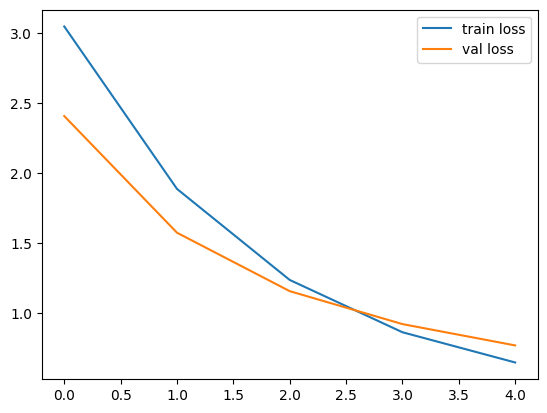

<Figure size 640x480 with 0 Axes>

In [18]:
plt.plot(results.history['loss'], label='train loss')
plt.plot(results.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_VGG16')

# Section 4: Evaluation

In [20]:
# Evaluate Model
evaluation_results_Vgg16 = model_vgg_case2.evaluate(test_set)

print("Test Loss:", evaluation_results_Vgg16[0])
print("Test Accuracy:", evaluation_results_Vgg16[1])

# Get model predictions on the test set
predictions_Vgg16 = model_vgg_case2.predict(test_set)

# Convert predictions to class labels
predicted_classes_Vgg16 = np.argmax(predictions_Vgg16, axis=1)

# Obtain true class labels from the test set
true_classes_Vgg16 = test_set.classes

# Calculate confusion matrix
conf_matrix_Vgg16 = confusion_matrix(true_classes_Vgg16, predicted_classes_Vgg16)

# Calculate classification report
class_report_Vgg16 = classification_report(true_classes_Vgg16, predicted_classes_Vgg16, target_names=test_set.class_indices)

# Calculate accuracy score
accuracy_Vgg16 = accuracy_score(true_classes_Vgg16, predicted_classes_Vgg16)

# Display results
print("Confusion Matrix:")
print(conf_matrix_Vgg16)

print("\nClassification Report:")
print(class_report_Vgg16)

print("\nAccuracy_Dense:", accuracy_Vgg16)


12/12 [==============================] - 201s 16s/step - loss: 0.7691 - accuracy: 0.8730
Test Loss: 0.769115149974823
Test Accuracy: 0.8729729652404785
12/12 [==============================] - 194s 16s/step
Confusion Matrix:
[[0 0 2 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 1 1 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 0 1 0]]

Classification Report:
              precision    recall  f1-score   support

       Ain ع       0.00      0.00      0.00        10
     Aliph ا       0.00      0.00      0.00        10
  Bari yeh ے       0.10      0.10      0.10        10
       Bay ب       0.00      0.00      0.00        10
      Chay چ       0.12      0.10      0.11        10
Chhoti yeh ی       0.00      0.00      0.00        10
     Daal  د       0.08      0.10      0.09        10
      Daal ڈ       0.00      0.00      0.00        10
     Dhaal ذ       0.07      0.10      0.08        10
    Dhuaad ض       0.00      0.00      0.00        10
      Djay ژ       0.00      0.00   